In [2]:
import pandas as pd
import numpy as np
import datetime

import networkx as nx
from matplotlib import pyplot as plt

In [3]:
# Load Data
trip_DF = pd.read_csv('D:/Users/nickb/PycharmProjectsD/TaxiProject/data/yellow_tripdata_2019-01.csv')

In [4]:
# Convert timestamps to Datetime objects
print(trip_DF.columns)
trip_DF["tpep_pickup_datetime"] = pd.to_datetime(trip_DF["tpep_pickup_datetime"], format='%Y-%m-%d %H:%M:%S', errors='ignore')
trip_DF["tpep_dropoff_datetime"] = pd.to_datetime(trip_DF["tpep_dropoff_datetime"], format='%Y-%m-%d %H:%M:%S', errors='ignore')

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [28]:
# restrict date range
small_DF = trip_DF[(trip_DF["tpep_pickup_datetime"] >= datetime.date(2019, 1, 1)) &
                  (trip_DF["tpep_pickup_datetime"] < datetime.date(2019, 1, 2))]
locations = set(small_DF["PULocationID"].values).union(set(small_DF["DOLocationID"].values))
print("Num Locations:", len(locations))
print("Num Rides:", len(small_DF))

# combine locations with same PU and DO
# the "agg" function controls the edge feature used -- eg: "count", "mean", "max", ...
grouped = small_DF.groupby(["PULocationID", "DOLocationID"]).agg({'fare_amount': ['count']})
grouped.columns = ["fare_amount"]
grouped.reset_index()

Num Locations: 256
Num Rides: 189035


c:\users\nickb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
c:\users\nickb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


,PULocationID,DOLocationID,fare_amount
0,1,1,21
1,1,132,1
2,3,3,2
3,3,51,1
4,3,61,1
5,4,4,23
6,4,7,4
7,4,11,1
8,4,13,6
9,4,14,2


In [29]:
# Iterate through grouped rows to construct ADJ matrix
adj_matrix = np.zeros((max(locations)+1, max(locations)+1))

for index, data in grouped.iterrows():
    adj_matrix[index] = data[0]
    
adj_matrix

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.100e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 3.000e+00, 0.000e+00, ..., 3.390e+02, 7.000e+00,
        3.000e+00],
       [0.000e+00, 1.000e+01, 0.000e+00, ..., 5.000e+00, 2.671e+03,
        2.200e+01],
       [0.000e+00, 4.000e+00, 0.000e+00, ..., 1.000e+00, 2.000e+00,
        1.270e+02]])

In [ ]:
G = nx.from_numpy_matrix(adj_matrix, create_using=nx.DiGraph)

In [ ]:
out_degree_sequence = dict(G.out_degree())

plt.hist(out_degree_sequence.values())
plt.title("Out Degrees")
plt.ylabel("freq")
plt.xlabel("degree")
plt.show()

in_degree_sequence = dict(G.in_degree())

plt.hist(in_degree_sequence.values())
plt.title("In Degrees")
plt.ylabel("freq")
plt.xlabel("degree")
plt.show()

In [ ]:
edge_weights = nx.get_edge_attributes(G,'weight')
sparse_edges = [edge for edge in edge_weights if edge_weights[edge] > 10]
H = G.edge_subgraph(sparse_edges)

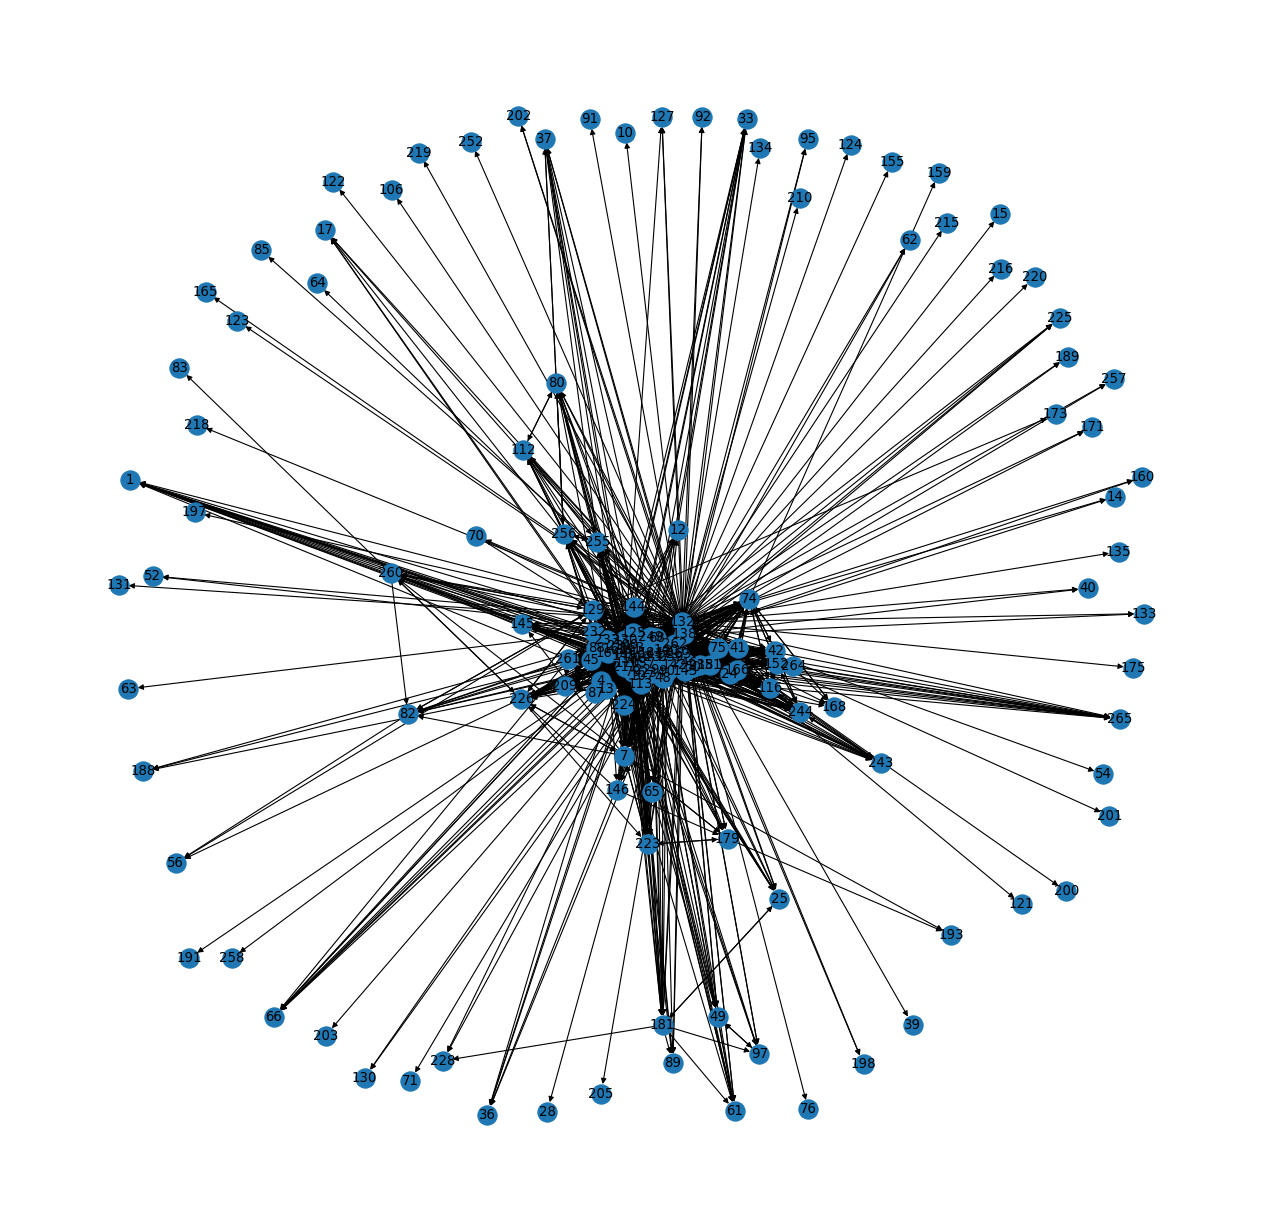

In [103]:
plt.figure(num=None, figsize=(20, 20), dpi=80)
plt.axis('off')
fig = plt.figure(1)
pos = nx.spring_layout(H, k=0.5)
nx.draw_networkx_nodes(H,pos)
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)

plt.show()
